# Census Income

# Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


# Import liabraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# To Encode the object data types

In [5]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [6]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [7]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


Workclass
4.0    22696
6.0     2541
2.0     2093
0.0     1836
7.0     1297
5.0     1116
1.0      960
8.0       14
3.0        7
Name: count, dtype: int64


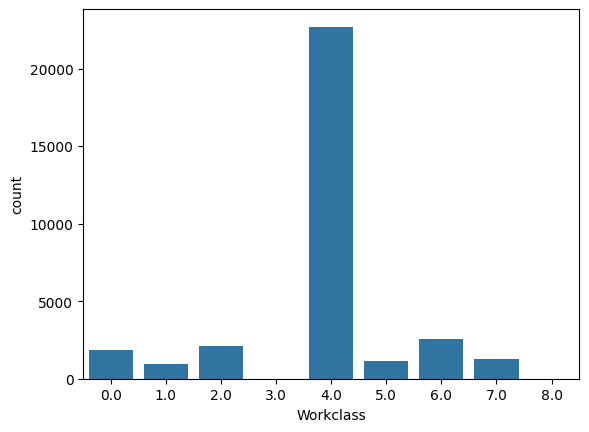

In [8]:
ax = sns.countplot(x='Workclass',data= df)
print(df["Workclass"].value_counts())

Education
11.0    10501
15.0     7291
9.0      5354
12.0     1723
8.0      1382
1.0      1175
7.0      1067
0.0       933
5.0       646
14.0      576
6.0       514
2.0       433
10.0      413
4.0       333
3.0       168
13.0       51
Name: count, dtype: int64


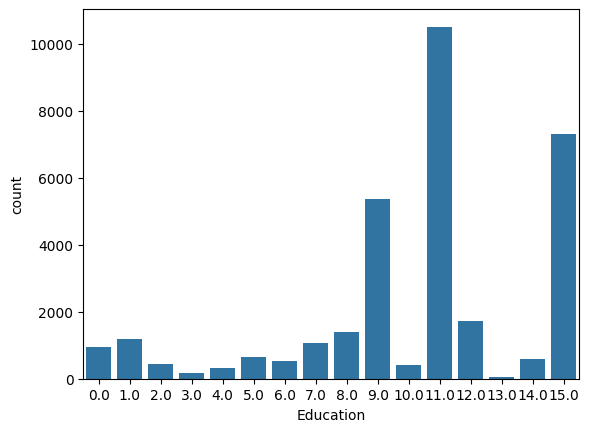

In [9]:
ay = sns.countplot(x="Education",data=df)
print(df["Education"].value_counts())

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Workclass,32560.0,3.868796,1.455879,0.0,4.0,4.0,4.0,8.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education,32560.0,10.298249,3.870317,0.0,9.0,11.0,12.0,15.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Marital_status,32560.0,2.611794,1.506225,0.0,2.0,2.0,4.0,6.0
Occupation,32560.0,6.572912,4.228809,0.0,3.0,7.0,10.0,14.0
Relationship,32560.0,1.446376,1.606794,0.0,0.0,1.0,3.0,5.0
Race,32560.0,3.665848,0.848817,0.0,4.0,4.0,4.0,4.0
Sex,32560.0,0.669195,0.470510,0.0,0.0,1.0,1.0,1.0


In [11]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


<Axes: >

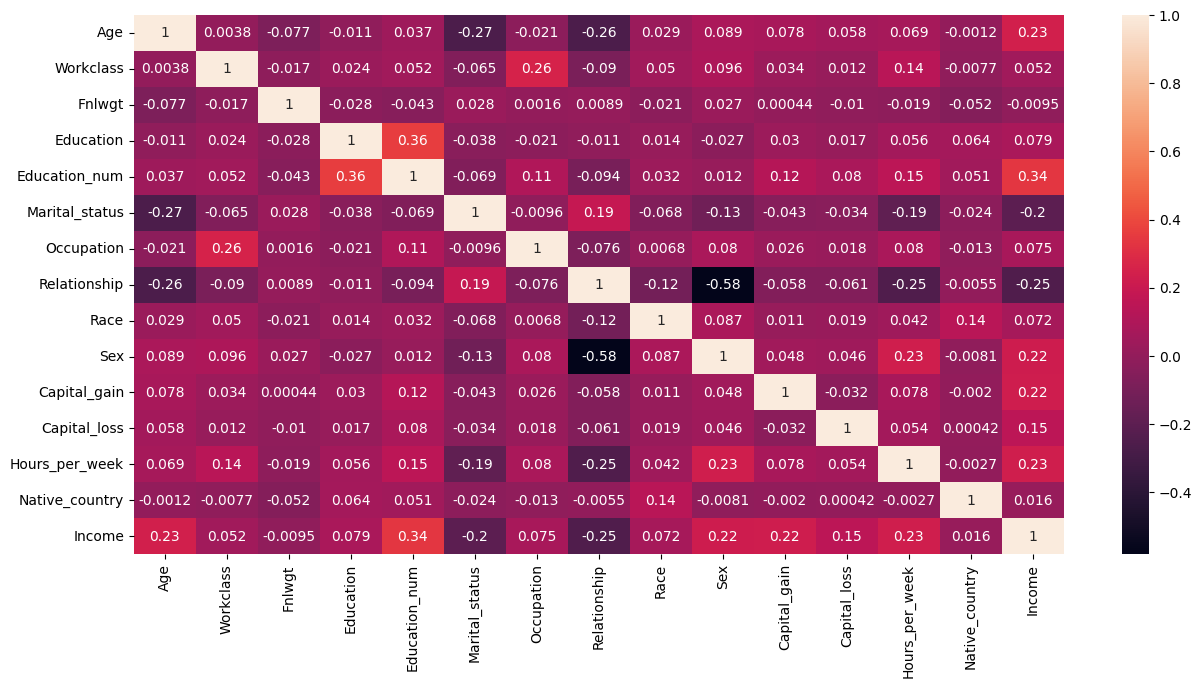

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [13]:
corr_matrix=df.corr()
corr_matrix['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

We can see that Education_num, Age are the major factors contributing to income followed by Hours per week and other factors. This will help in concluding remarks.

Now to seperate dependent and independent variables, x and y

In [14]:
x = df.drop("Income",axis=1)
y = df["Income"]

In [15]:
x.skew().sort_values(ascending = False)

Capital_gain      11.953690
Capital_loss       4.594549
Fnlwgt             1.446972
Relationship       0.786784
Age                0.558738
Hours_per_week     0.227636
Occupation         0.114540
Marital_status    -0.013448
Education_num     -0.311630
Sex               -0.719244
Workclass         -0.752280
Education         -0.934063
Race              -2.435332
Native_country    -3.658235
dtype: float64

We see that the data is skewed and to bring the skewness in the range of (-0.5,0.5) using power transform

In [16]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [17]:
type(x_new)

numpy.ndarray

In [18]:
x = pd.DataFrame(x_new,columns = x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.891947,1.644223,-1.089889,-0.477012,1.164793,-0.383427,-0.502825,-1.094635,0.412893,0.703087,-0.301370,-0.221213,-2.221515,0.329074
1,0.102717,0.011864,0.398743,0.090482,-0.464330,-1.782434,-0.013085,0.134511,0.412893,0.703087,-0.301370,-0.221213,-0.035570,0.329074
2,1.064381,0.011864,0.562540,-2.067600,-1.200274,-0.383427,-0.013085,-1.094635,-2.431920,0.703087,-0.301370,-0.221213,-0.035570,0.329074
3,-0.731663,0.011864,1.340398,-0.477012,1.164793,-0.383427,0.829763,1.549018,-2.431920,-1.422298,-0.301370,-0.221213,-0.035570,-3.224844
4,0.028023,0.011864,0.957182,0.395133,1.600809,-0.383427,-0.502825,1.549018,0.412893,-1.422298,-0.301370,-0.221213,-0.035570,0.329074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.827983,0.011864,0.746749,-0.984718,0.739697,-0.383427,1.386870,1.549018,0.412893,-1.422298,-0.301370,-0.221213,-0.197550,0.329074
32556,0.247374,0.011864,-0.193298,0.090482,-0.464330,-0.383427,0.211660,-1.094635,0.412893,0.703087,-0.301370,-0.221213,-0.035570,0.329074
32557,1.334556,0.011864,-0.219755,0.090482,-0.464330,2.171784,-1.415274,1.351388,0.412893,-1.422298,-0.301370,-0.221213,-0.035570,0.329074
32558,-1.358341,0.011864,0.271668,0.090482,-0.464330,0.919719,-1.415274,1.091081,0.412893,0.703087,-0.301370,-0.221213,-1.654992,0.329074


In [19]:
sk = x.skew()

In [20]:
sk[np.abs(sk)>0.25].all()

True

Now we need to check whether outliers are present in the data or not. For that we need to check if the z value of all the factors are exceeding the range (-3,3)

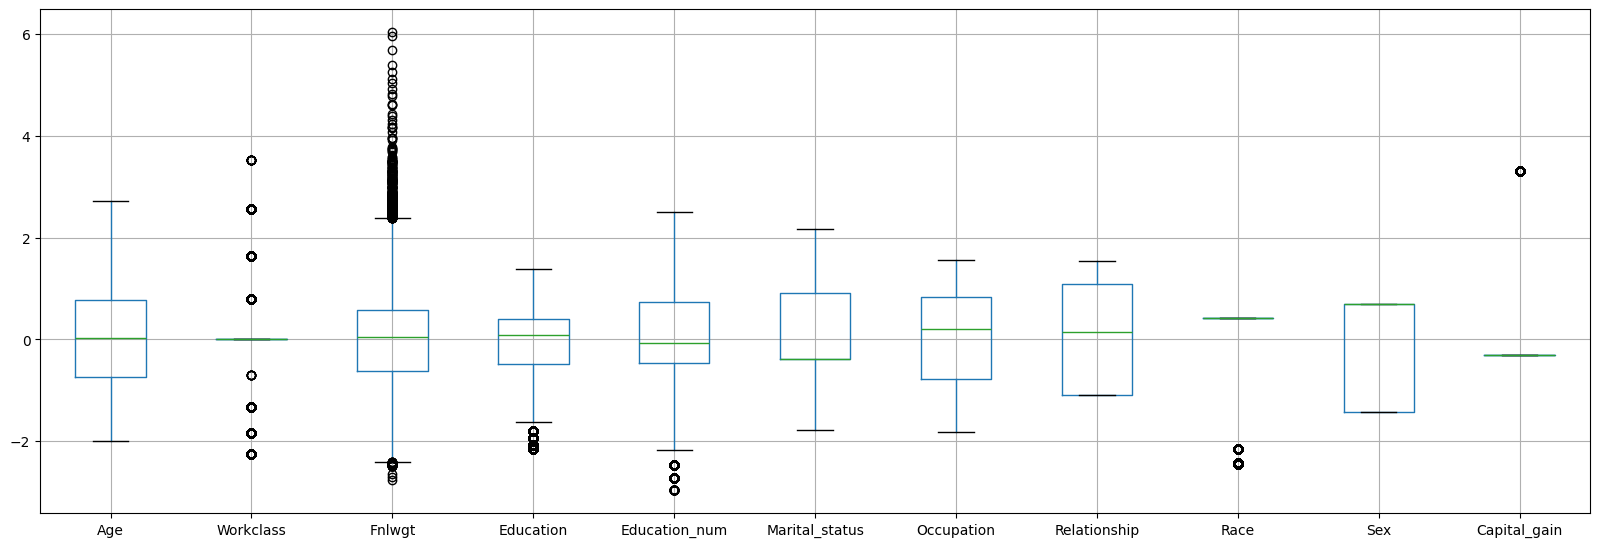

In [21]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

As we see there are no outliers, thus can proceed with modeling

In [23]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.891947,1.644223,-1.089889,-0.477012,1.164793,-0.383427,-0.502825,-1.094635,0.412893,0.703087,-0.301370,-0.221213,-2.221515,0.329074
1,0.102717,0.011864,0.398743,0.090482,-0.464330,-1.782434,-0.013085,0.134511,0.412893,0.703087,-0.301370,-0.221213,-0.035570,0.329074
2,1.064381,0.011864,0.562540,-2.067600,-1.200274,-0.383427,-0.013085,-1.094635,-2.431920,0.703087,-0.301370,-0.221213,-0.035570,0.329074
3,-0.731663,0.011864,1.340398,-0.477012,1.164793,-0.383427,0.829763,1.549018,-2.431920,-1.422298,-0.301370,-0.221213,-0.035570,-3.224844
4,0.028023,0.011864,0.957182,0.395133,1.600809,-0.383427,-0.502825,1.549018,0.412893,-1.422298,-0.301370,-0.221213,-0.035570,0.329074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.827983,0.011864,0.746749,-0.984718,0.739697,-0.383427,1.386870,1.549018,0.412893,-1.422298,-0.301370,-0.221213,-0.197550,0.329074
32556,0.247374,0.011864,-0.193298,0.090482,-0.464330,-0.383427,0.211660,-1.094635,0.412893,0.703087,-0.301370,-0.221213,-0.035570,0.329074
32557,1.334556,0.011864,-0.219755,0.090482,-0.464330,2.171784,-1.415274,1.351388,0.412893,-1.422298,-0.301370,-0.221213,-0.035570,0.329074
32558,-1.358341,0.011864,0.271668,0.090482,-0.464330,0.919719,-1.415274,1.091081,0.412893,0.703087,-0.301370,-0.221213,-1.654992,0.329074


In [24]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32555    0.0
32556    1.0
32557    0.0
32558    0.0
32559    1.0
Name: Income, Length: 32560, dtype: float64

To predict the Census Income, we need to do logistic regression modelling as this a classification question, either the income is <=50k or >=50k.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [27]:
maxAcc=0
maxRS =0
for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is", maxAcc,"On Random State",maxRS)

Best accuracy is 0.8429054054054054 On Random State 109


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=109)

In [29]:
x_train

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
14943,-0.126492,1.644223,0.912318,0.090482,-0.464330,-0.383427,-0.775241,-1.094635,0.412893,0.703087,-0.301370,-0.221213,-0.035570,0.329074
16684,1.386254,0.011864,-1.927902,1.387031,-0.075517,-0.383427,-0.502825,-1.094635,0.412893,0.703087,-0.301370,-0.221213,-0.035570,0.329074
28882,-0.458656,-1.321880,-0.819094,0.395133,1.600809,-0.383427,0.829763,-1.094635,0.412893,0.703087,-0.301370,-0.221213,0.369410,0.329074
4772,0.519640,1.644223,-2.226228,1.387031,-0.075517,0.919719,-0.250258,1.091081,0.412893,0.703087,-0.301370,-0.221213,1.584564,0.329074
29740,0.891947,0.011864,-2.382115,0.395133,1.600809,-0.383427,0.829763,-1.094635,0.412893,0.703087,3.318223,-0.221213,0.774428,0.329074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16368,-0.288442,1.644223,-0.056573,-2.067600,-1.200274,-1.782434,-0.013085,0.134511,0.412893,0.703087,-0.301370,-0.221213,-2.706910,0.329074
16525,-1.135502,0.011864,-1.092489,-0.477012,1.164793,0.919719,-0.502825,0.134511,0.412893,0.703087,-0.301370,-0.221213,-0.035570,0.329074
7925,-1.858231,0.011864,-0.074179,1.387031,-0.075517,0.919719,0.426075,1.091081,0.412893,-1.422298,-0.301370,-0.221213,-0.845396,0.329074
19701,-0.288442,1.644223,1.903403,0.090482,-0.464330,-0.383427,1.206657,-1.094635,0.412893,0.703087,-0.301370,-0.221213,1.584564,0.329074


In [30]:
y_train

14943    0.0
16684    1.0
28882    0.0
4772     0.0
29740    1.0
        ... 
16368    0.0
16525    0.0
7925     0.0
19701    1.0
11526    0.0
Name: Income, Length: 26048, dtype: float64

In [31]:
x_test

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
2948,-0.458656,0.011864,0.134070,0.090482,-0.464330,0.919719,-0.775241,1.091081,0.412893,0.703087,-0.30137,-0.221213,0.126417,0.329074
19654,-0.372459,0.011864,0.327743,-0.477012,1.164793,0.919719,-0.502825,0.722939,0.412893,0.703087,-0.30137,4.520526,0.774428,0.329074
31755,-0.731663,0.011864,-0.020191,0.090482,-0.464330,0.919719,-0.013085,1.091081,0.412893,-1.422298,-0.30137,-0.221213,-0.035570,0.329074
12817,0.772163,0.794301,-0.515796,1.387031,-0.075517,-0.383427,1.206657,-1.094635,0.412893,0.703087,-0.30137,-0.221213,-0.197550,0.329074
2882,0.584497,0.011864,0.852732,0.395133,1.600809,-1.782434,-0.502825,0.134511,0.412893,-1.422298,-0.30137,-0.221213,0.774428,0.329074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,-1.135502,0.011864,0.693470,-0.738686,0.326058,-0.383427,-0.775241,-1.094635,0.412893,0.703087,-0.30137,-0.221213,-0.035570,-3.221223
17694,-1.997034,0.011864,0.328850,-2.161297,-1.545297,0.919719,-0.013085,1.091081,0.412893,0.703087,-0.30137,-0.221213,-1.654992,0.329074
11126,0.772163,-1.321880,-0.285504,-0.477012,1.164793,-1.782434,0.829763,1.351388,0.412893,-1.422298,-0.30137,-0.221213,1.584564,0.329074
5660,-1.725471,0.011864,-0.937839,-1.426297,-2.182236,0.919719,-0.775241,1.091081,0.412893,0.703087,-0.30137,4.520526,-0.683447,0.329074


In [32]:
y_test

2948     0.0
19654    1.0
31755    0.0
12817    1.0
2882     1.0
        ... 
28673    0.0
17694    0.0
11126    0.0
5660     0.0
10535    0.0
Name: Income, Length: 6512, dtype: float64

In [33]:
x_train.shape

(26048, 14)

In [34]:
y_train.shape

(26048,)

In [36]:
x_test.shape

(6512, 14)

In [37]:
y_test.shape

(6512,)

Once we have splitted the data into train and test data we can check the accuracy using various classifiers

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
LR =  LogisticRegression()
LR.fit(x_train,y_train)
predlr= LR.predict(x_test)
print("Accuracy", accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 84.29054054054053
[[4769  298]
 [ 725  720]]
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      5067
         1.0       0.71      0.50      0.58      1445

    accuracy                           0.84      6512
   macro avg       0.79      0.72      0.74      6512
weighted avg       0.83      0.84      0.83      6512



# Decision Tree Classification

In [39]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
preddt= DT.predict(x_test)
print("Accuracy", accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 81.06572481572482
[[4406  661]
 [ 572  873]]
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      5067
         1.0       0.57      0.60      0.59      1445

    accuracy                           0.81      6512
   macro avg       0.73      0.74      0.73      6512
weighted avg       0.81      0.81      0.81      6512



# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predrf= RF.predict(x_test)
print("Accuracy", accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 86.21007371007371
[[4704  363]
 [ 535  910]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      5067
         1.0       0.71      0.63      0.67      1445

    accuracy                           0.86      6512
   macro avg       0.81      0.78      0.79      6512
weighted avg       0.86      0.86      0.86      6512



# Support Vector Classifier

In [41]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsv= svc.predict(x_test)
print("Accuracy", accuracy_score(y_test,predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuracy 85.04299754299754
[[4771  296]
 [ 678  767]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      5067
         1.0       0.72      0.53      0.61      1445

    accuracy                           0.85      6512
   macro avg       0.80      0.74      0.76      6512
weighted avg       0.84      0.85      0.84      6512



# Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score

scr1 = cross_val_score(LR,x,y,cv=5)
print("Cross Validation score of Logistic Regression model is", scr1.mean())

scr2 = cross_val_score(RF,x,y,cv=5)
print("Cross Validation score of Random Forest Classifier model is", scr2.mean())

scr3 = cross_val_score(DT,x,y,cv=5)
print("Cross Validation score of Decision Tree Classifier model is", scr3.mean())

scr4 = cross_val_score(svc,x,y,cv=5)
print("Cross Validation score of Support Vector Classifier is", scr4.mean())

Cross Validation score of Logistic Regression model is 0.8247542997542997
Cross Validation score of Random Forest Classifier model is 0.8519963144963144
Cross Validation score of Decision Tree Classifier model is 0.8029176904176903
Cross Validation score of Support Vector Classifier is 0.8357186732186733


We see that best Accuracy is given by Random forest Classifier of 86.21% and cross validation score as 85% Thus it is a very good  fitted model

# Hyper Parameter Testing

In [43]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['sqrt','auto','log2'],
            'max_depth':range(1,50,3),
            'criterion':['gini','entropy']}

In [44]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt'}

In [52]:
GCV_pred = GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8679361179361179

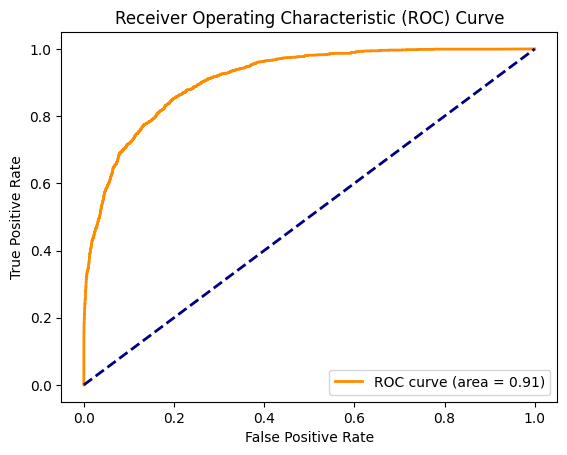

In [56]:
from sklearn.metrics import roc_curve, auc

# Get the best estimator from the GridSearchCV object
best_model = GCV.best_estimator_

# Make predictions using the best model
y_pred_proba = best_model.predict_proba(x_test)[:, 1]  # it's a binary classification and we need probabilities of the positive class

# Compute the ROC curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Saving the model

In [58]:
import joblib
joblib.dump(GCV.best_estimator_,'Census_Income.pkl')

['Census_Income.pkl']